<a href="https://colab.research.google.com/github/edgarriba/kornia-examples/blob/master/geometry_generate_patch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example showing how to generate patches

In [1]:
!pip install matplotlib

In [2]:
!wget "https://drive.google.com/uc?id=1csRODQDb9Gtlf8wAlvFDZ-4QF2VpSL9V" -O img1.ppm

--2020-04-02 13:33:50--  https://drive.google.com/uc?id=1csRODQDb9Gtlf8wAlvFDZ-4QF2VpSL9V
Resolving drive.google.com (drive.google.com)... 64.233.170.101, 64.233.170.100, 64.233.170.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.170.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jpmk0o772ajkerakfg52mol8qskalt1e/1585834425000/16282022020470575334/*/1csRODQDb9Gtlf8wAlvFDZ-4QF2VpSL9V [following]
--2020-04-02 13:33:51--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jpmk0o772ajkerakfg52mol8qskalt1e/1585834425000/16282022020470575334/*/1csRODQDb9Gtlf8wAlvFDZ-4QF2VpSL9V
Resolving doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googleusercontent.com)|172.2

In [3]:
pip install git+https://github.com/kornia/kornia

  Cloning https://github.com/kornia/kornia to /tmp/pip-req-build-iljg0o5m
  Running command git clone -q https://github.com/kornia/kornia /tmp/pip-req-build-iljg0o5m
  Created wheel for kornia: filename=kornia-0.2.0+55bf2bf-py2.py3-none-any.whl size=148465 sha256=2966969ad63eb1a66474fa7c6eb37230a9849d91219dc0f985f257e1a852ec83
  Stored in directory: /tmp/pip-ephem-wheel-cache-nipy8wxi/wheels/5f/8b/92/375714dc479253f78ed777dd105d79f9693448dcfef85c8163
Successfully built kornia


In [0]:
#First load libraries and images
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import cv2

import torch
import kornia as K

In [0]:
def imshow(image: np.ndarray, height: int = 10, width: int = 10):
    """Utility function to plot images."""
    plt.figure(figsize=(height, width))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [0]:
def imread(data_path: str) -> torch.Tensor:
    """Utility function that load an image an convert to torch."""
    # open image using OpenCV (HxWxC)
    img: np.ndarray = cv2.imread(data_path, cv2.IMREAD_COLOR)

    # cast image to torch tensor and convert to RGB
    img_t: torch.Tensor = K.image_to_tensor(img, keepdim=False)  # BxCxHxW
    img_t = K.bgr_to_rgb(img_t)

    return img_t.float() / 255.

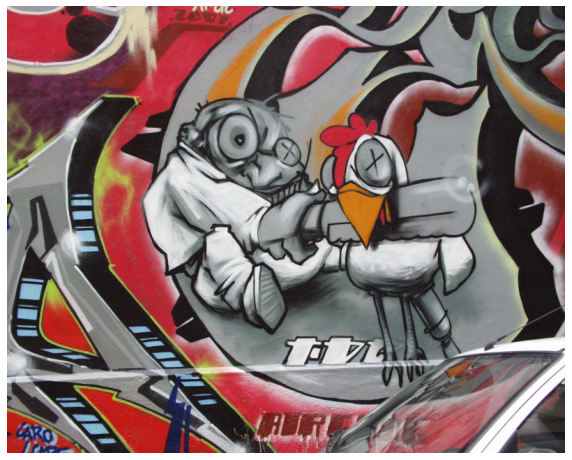

In [8]:
torch.manual_seed(0)

timg: torch.Tensor = imread('img1.ppm')

imshow(K.tensor_to_image(timg), 10, 10)

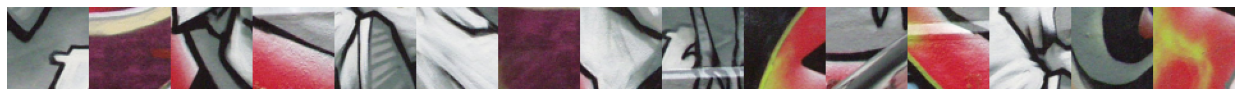

In [9]:
# crop a random patch

random_crop = K.augmentation.RandomCrop((64, 64))

patch = torch.cat([random_crop(timg) for _ in range(15)], dim=-1)

imshow(K.tensor_to_image(patch[0]), 22, 22)

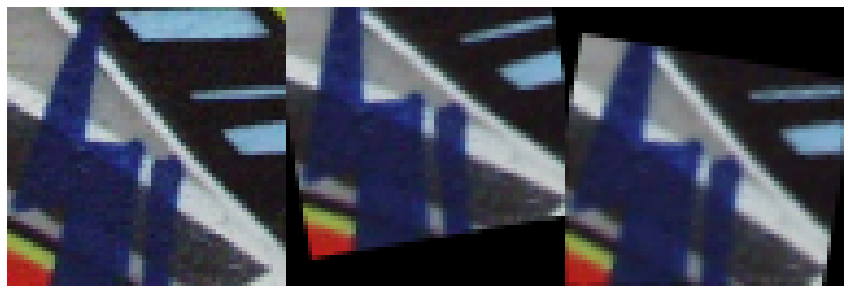

In [10]:
# transform a patch 

random_crop = K.augmentation.RandomCrop((64, 64))
random_affine = K.augmentation.RandomAffine(
    [-15, 15], [0., 0.25], return_transform=True)

# crop
patch = random_crop(timg)

# transform and retrieve transformation
patch_affine, transformation = random_affine(patch)

# invert patch
_, _, H, W = patch.shape
patch_inv = K.warp_perspective(
    patch_affine, torch.inverse(transformation), (H, W)
)

# visualise - (original, transformed, reconstructed)
patches_vis = torch.cat([patch, patch_affine, patch_inv], dim=-1)
imshow(K.tensor_to_image(patches_vis), 15, 15)